# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [31]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков



Прочитаем исходные данные:

In [32]:
data = pd.read_csv(r"C:\Data_sets\unconv.csv")
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [19]:
# Ваш код здесь
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [11]:
data.shape

(200, 8)

In [12]:
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [14]:
data.isna().sum()

Well       0
Por        0
Perm       0
AI         0
Brittle    0
TOC        0
VR         0
Prod       0
dtype: int64

Посмотрим как распределены признаки

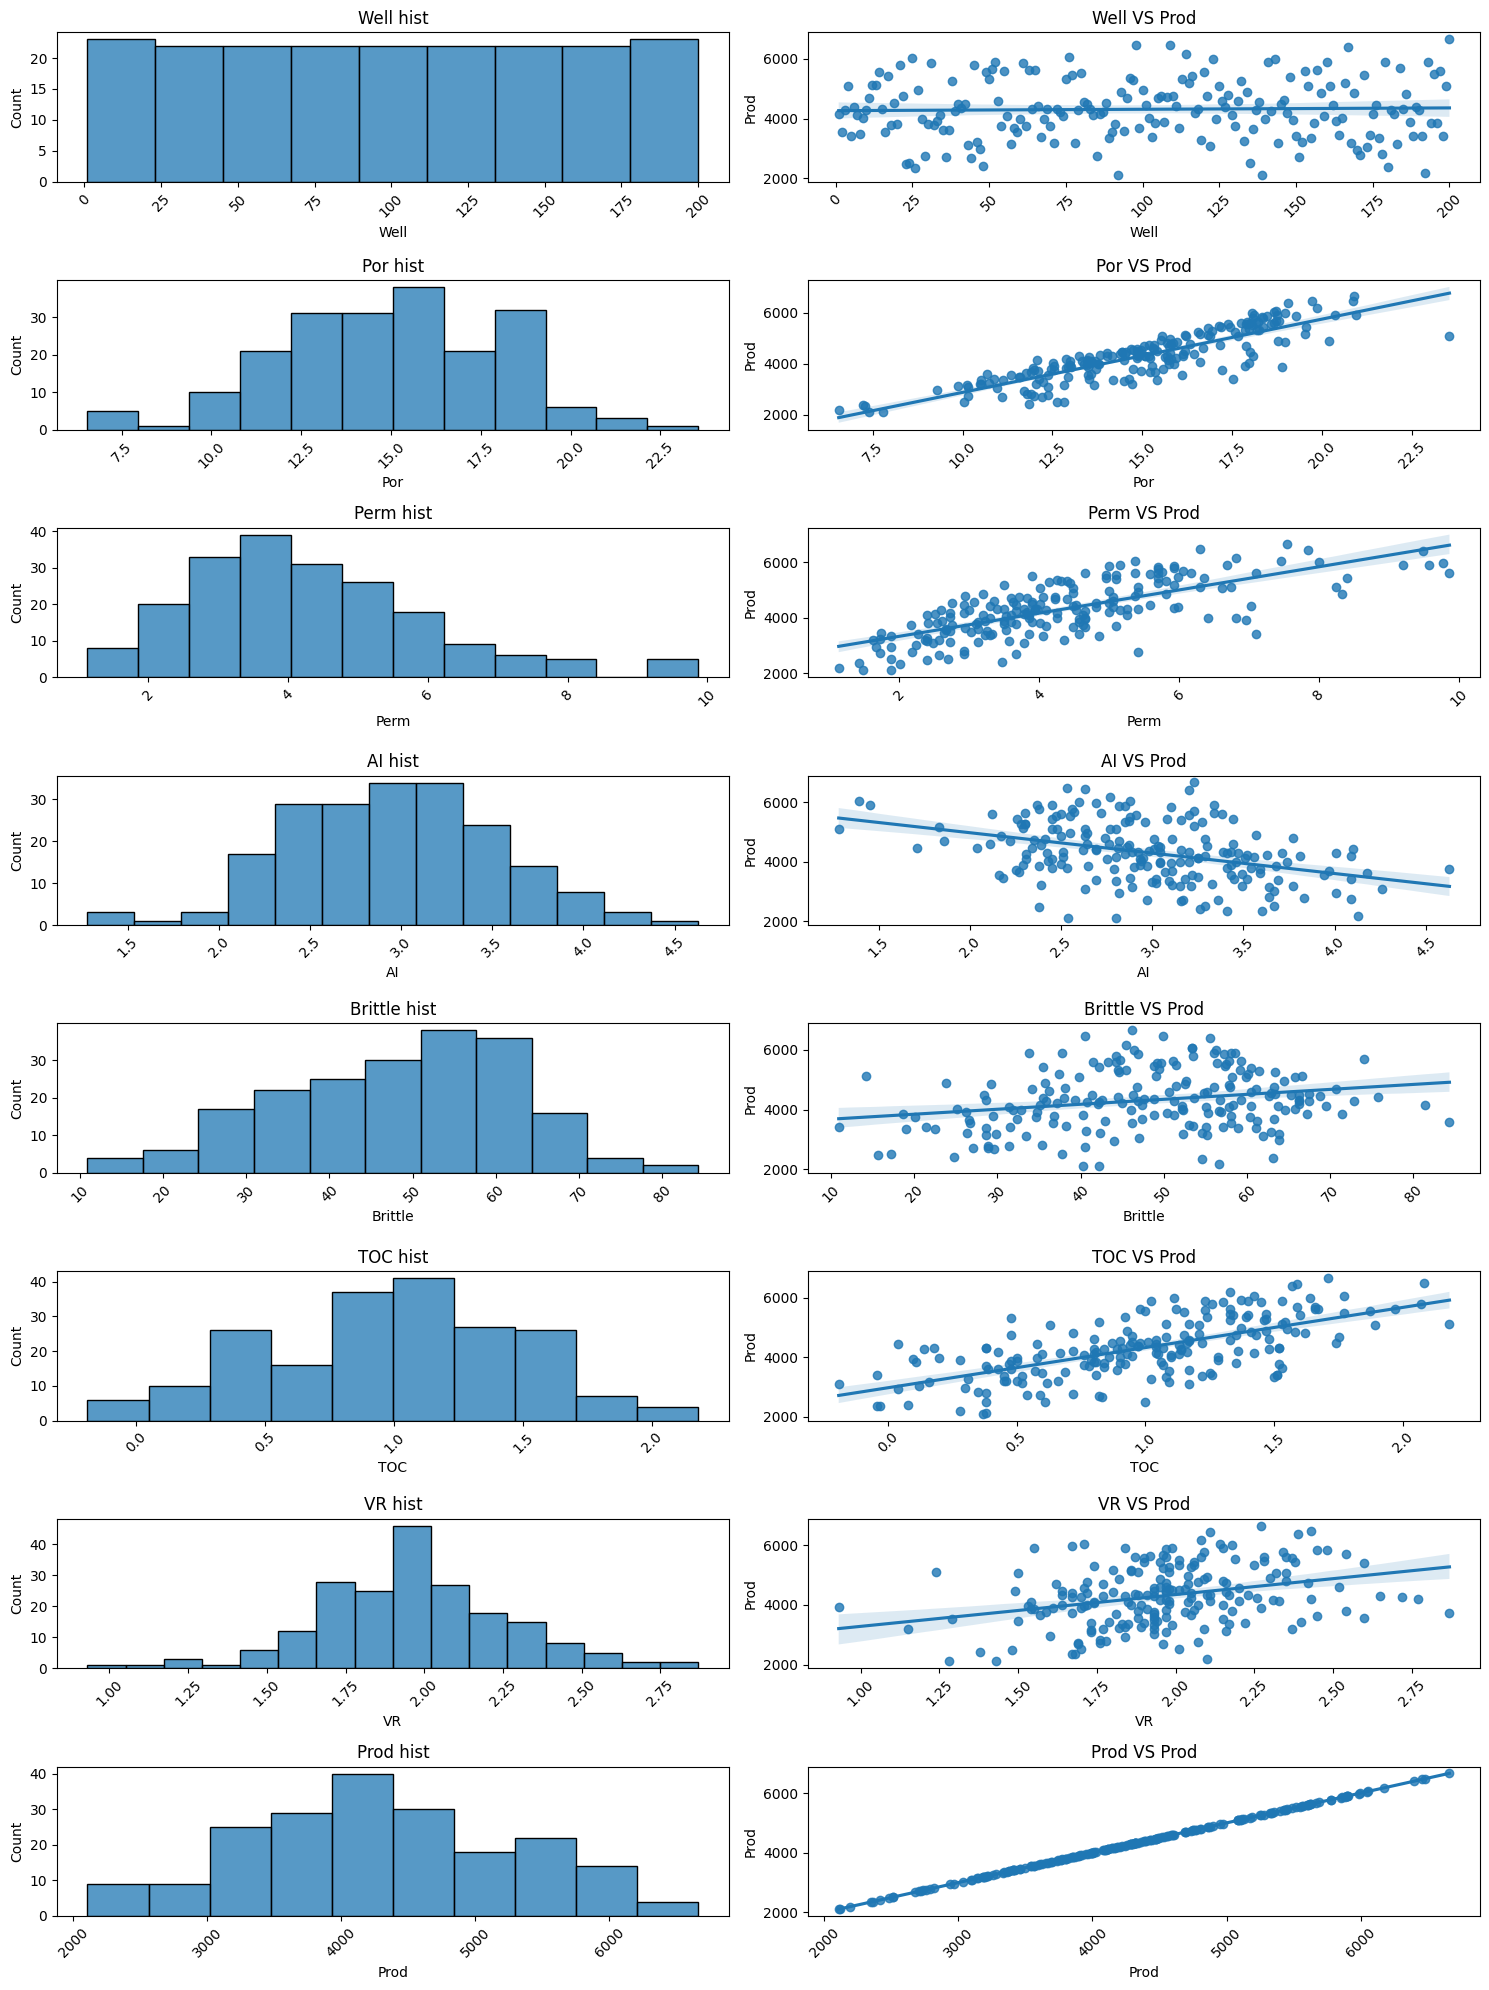

In [16]:
num_features = data.columns.to_list()
n = len(num_features) #количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 20)) # фигура + n х 2 координатных плоскостей
#Создаем цикл для всех признаков из списка числовых признаков
for i, feature in enumerate(num_features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму распределения признака 
    histplot = sns.histplot(data=data, x=feature, ax=axes[i][0])
    #Добавляем подпись графику
    histplot.set_title('{} hist'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    #Строим диаграмму рассеяния 
    regplot = sns.regplot(data=data, x=feature, y='Prod', ax=axes[i][1])
    #Добавляем подпись графику
    regplot.set_title('{} VS Prod'.format(feature));
    #Добавляем поворот отметок на оси абсцисс
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout() #выравнивание графиков

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [36]:
# составляем матрицу наблюдений без дополнительного столбца из единиц
A = data[['Well', 'Por', 'Perm', 'AI','Brittle','TOC','VR','Prod']]
y = data[['Prod']]
# стандартизируем векторы в столбцах матрицы A
A_cent = A - A.mean(axis=0)
A_st = A_cent/np.linalg.norm(A_cent, axis=0)
A_st.describe().round(2)

y_cent = y - y.mean()
y_st = y_cent/np.linalg.norm(y_cent)

## Матрица Грама
C = A_st.T @ A_st
C

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


In [37]:
c=np.linalg.det(C) # Расчет определителя матрицы
c

0.0007299388072651668

In [38]:
np.linalg.matrix_rank(C)

8

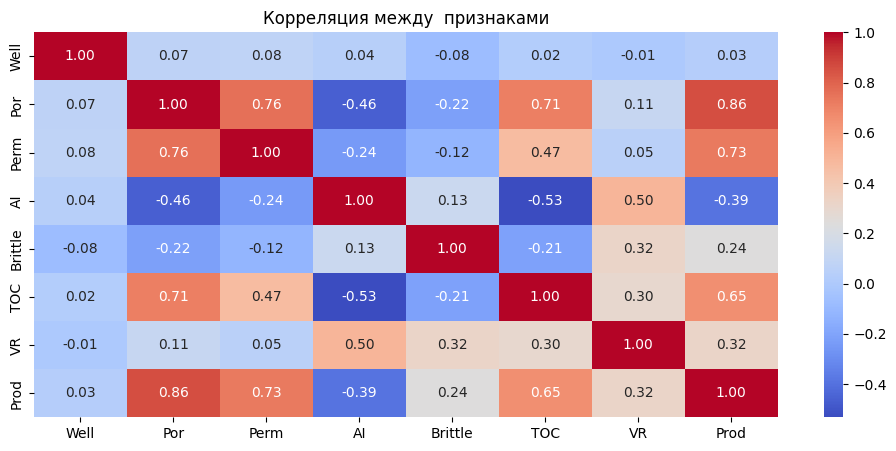

In [39]:
# Создаем тепловую карту корреляции
plt.figure(figsize=(12, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между  признаками')
plt.show();

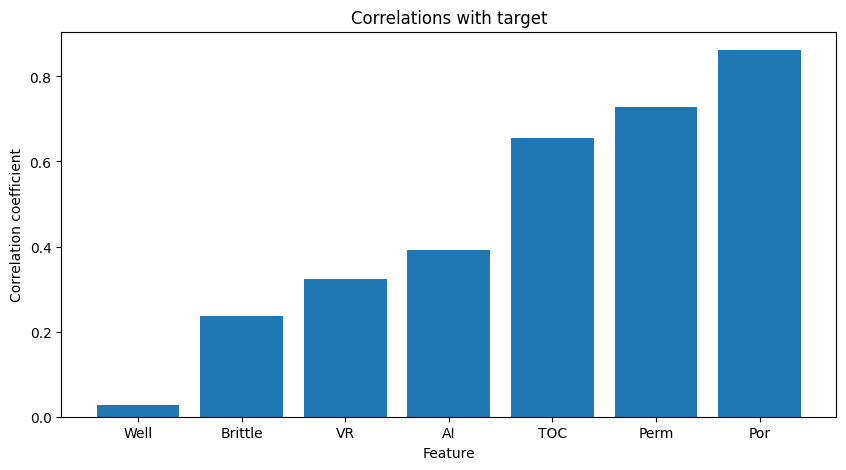

In [40]:
# Ваш код здесь
#Вычисляем модуль корреляции
corr_with_target = data.corr()['Prod'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('Prod')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

**Сильнее всего коррелируют с целевой переменной следующие факторы: Por: 0.86, Perm: 0.73, TOC: 0.65. Корреляционная матрица является плохо обусловенной (её опредитель близок к нулю). Коллинеарности нет, т.к. нет линейной зависимости между факторами (ранг матрицы максимальный), но присутствует мультиколлинеарность, т.к. есть факторы с сильной корреляционной зависимостью (выше 0.7), об этом говорит и слишком низкий определитель матрицы.Модель классической линейной регрессии по методу МНК в данном случае применима. В реализации линейной регрессии в sklearn предусмотрена борьба с плохо определёнными (близкими к вырожденным и вырожденными) матрицами. Для этого используется метод под названием сингулярное разложение (SVD)**.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [41]:
# Ваш код здесь

X = np.column_stack((np.ones(200), data.drop('Prod', axis=1)))
y = data[['Prod']]
w_hat = np.round(np.linalg.inv(X.T@X)@X.T@y)
w_hat


,Prod
0,-1232.0
1,0.0
2,230.0
3,116.0
4,-365.0
5,25.0
6,-78.0
7,785.0


> Признак Well является неинформативным, т.к. его коэффициент равен нулю. Интерпретация коэффициентов: если Por — пористость скважины увеличится на 1%, то добыча газа в сутки увеличится на 230 млн. кубических футов. Если AI — акустический импеданс увеличится на 1 кг/м2*10**6, то добыча газа в сутки уменьшиться на 365 млн. кубических футов.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [42]:
from sklearn import metrics
# параметры одной скважины
X_1 = np.array([[106.0, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42]])
y_1 =  np.array([4748.315024]) 

# добавляем столбец с единицами для умножения на свободный член w0
A_1 = np.column_stack((np.ones(1), X_1))

# прогноз для одной скважины
y_1_pred = A_1 @ w_hat

mae_score = metrics.mean_absolute_error(y_1, y_1_pred)

print('MAE score: {:.3f} thou. $'.format(mae_score))

# прогноз для всех скважин
y_pred = X@w_hat


#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_pred) * 100))
print('MAE score: {:.3f}'.format(metrics.mean_absolute_error(y, y_pred)))




MAE score: 33.055 thou. $
MAPE score: 3.648 %
MAE score: 154.558


>Средняя абсолютная ошибка — MAE (Mean Absolute Error) для одной скважины составила 25 т.долларов. Т. е модель ошиблась относительно незначительно. Для дальнейшего решения задачи выбрана классическая метрика MAPE - Средняя абсолютная ошибка в процентах — MAPE (Mean Absolute Percent Error). Эта метрика показывает, на сколько процентов в среднем наше предсказание отклоняется от реального значения. Эта метрика отлично показывает себя в задачах, когда неизвестно, какое значение целевого показателя считать приемлемым.В данном случае используем в паре с MAE, чтобы знать абсолютную ошибку и её значение в процентах.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

,0,1,2,3,4,5,6,7
Prod,-1232.0,0.0,230.0,116.0,-365.0,25.0,-78.0,785.0


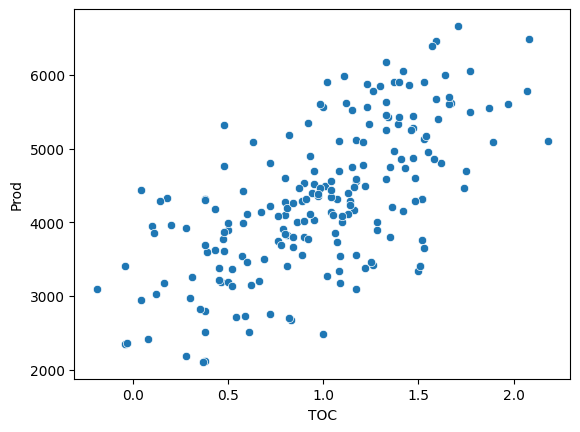

In [43]:
# Ваш код здесь
display(w_hat.round().T)

# строим диаграму рассеяния  
sns.scatterplot(data=data, x='TOC', y='Prod');

> *В модели есть фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции - это TOC = -78. Этот коэффициент говорит о том, что зависимость между процентом органического углерода и производительностью скважины обратная. Но коэффициент корреляции между этим фактором и целевым признаком равен 0.65, что говорит о том, что зависимость прямая. Это так же видно и на диаграме рассеяния - зависимость прямая.Такой результат можно объяснить сильной мультиколлинеарностью в данных, которая «портит» коэффициенты.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

MAPE score: 4.050 %


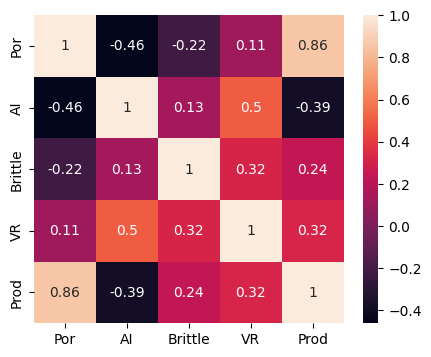

In [44]:
# Ваш код здесь
data_new = data[['Por', 'AI', 'Brittle', 'VR', 'Prod']]

# расчёт корреляционной матрицы
data_corr = pd.DataFrame.corr(data_new)

# строим тепловую карту корреляций
fig = plt.figure(figsize=(5, 4))
sns.heatmap(data_corr, annot=True);

# X_new - матрица наблюдений, y_new - вектор правильных ответов
X_new = data_new.drop('Prod', axis=1)
y_new = data_new['Prod']

# добавляем столбец с единицами для умножения на свободный член w0
A = np.column_stack((np.ones(200), X_new))

# вычислим OLS-оценку для коэффициентов
w_hat_new = np.round(np.linalg.inv(A.T@A)@A.T@y)



# прогноз для всех скважин
y_pred = A @ w_hat_new

print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_pred) * 100))


> *1. Интерпретация коэффициентов: если Por — пористость скважины увеличится на 1%, то добыча газа в сутки увеличится на 293 млн. кубических футов. Если AI — акустический импеданс увеличится на 1 кг/м2*10**6, то добыча газа в сутки уменьшиться на 200 млн. кубических футов.  
Значения изменились. Por с 230 на 293, AI с -365 на -200 Метрика MAPE ухудшилась, была 3,6 стала 4. После удаления сильно коррелированных признаков, противоречий коэффициентов линейной регрессии и коэффициентов корреляции нет.*

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [45]:
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки
%matplotlib inline


In [46]:
# Ваш код здесь
from sklearn import linear_model #линейные модели
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# вычисляем коэффициенты регрессии
model.fit(X_new, y_new)
y_pred = model.predict(X_new) 

#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': X_new.columns, 'Coefficients': model.coef_.round()})
#Составляем строку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': model.intercept_.round()})
coef_df = pd.concat([intercept_df, w_df], ignore_index=True)
display(coef_df)
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_pred) * 100))


,Features,Coefficients
0,INTERCEPT,-1835.0
1,Por,293.0
2,AI,-200.0
3,Brittle,28.0
4,VR,517.0


MAPE score: 4.044 %


> Коэффициенты линейной регрессии и метрика MAPE полученные вручную и с помощью библиотеки одинаковые.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [47]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [48]:
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# берем данные уже с новым составом признаков
X_new = data_new.drop('Prod', axis=1)
y_new = data_new['Prod']

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# Создаем объект для генерации полиномиальных признаков степени 3
poly = PolynomialFeatures(degree=3, include_bias=False)
X_scaled_poly = poly.fit_transform(X_scaled)

# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_scaled_poly, y_new)

scores = cross_validate(model, X_scaled_poly, y_new, cv=5, scoring='neg_mean_absolute_percentage_error',return_train_score=True)




# Выводим результаты
print ('MAPE на тренировочных фолдах: {:.2f} %'.format(-scores['train_score'].mean()* 100))
print ('MAPE на валидационных фолдах: {:.2f} %'.format(-scores['test_score'].mean() * 100))

MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.68 %


> В процессе моделирования получены неплохие значения MAPE и для тренировочных, и для валидационных фолдов.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [49]:
# Ваш код здесь

lasso_lr_poly = linear_model.Lasso(alpha=0.9)
#Обучаем модель
lasso_lr_poly.fit(X_scaled_poly, y_new)
#Делаем предсказание для тренировочной выборки

scores = cross_validate(lasso_lr_poly, X_scaled_poly, y_new, cv=5, scoring='neg_mean_absolute_percentage_error',return_train_score=True)




# Выводим результаты
print ('MAPE на тренировочных фолдах: {:.2f} %'.format(-scores['train_score'].mean()* 100))
print ('MAPE на валидационных фолдах: {:.2f} %'.format(-scores['test_score'].mean() * 100))



MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.49 %


> Метрики стали лучше. 

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [52]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, cross_validate

# Определяем модель Ridge
ridge_lr = linear_model.Ridge()

# Определяем диапазон значений для alpha
param_grid = {
    'alpha': np.logspace(-4, 4, 10)  # Значения alpha от 0.0001 до 10000
}

# Настраиваем GridSearchCV
grid_search = GridSearchCV(ridge_lr, param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', return_train_score=True)

# Обучаем модель с помощью GridSearchCV
grid_search.fit(X_scaled_poly, y_new)

# Получаем лучшие параметры
best_alpha = round(grid_search.best_params_['alpha'],3)

# Выводим лучшие параметры
print(f'Лучший alpha: {best_alpha}')

# Оцениваем модель с лучшими параметрами
best_model = grid_search.best_estimator_
scores = cross_validate(best_model, X_scaled_poly, y_new, cv=5, scoring='neg_mean_absolute_percentage_error', return_train_score=True)

# Выводим результаты MAPE
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-scores['train_score'].mean() * 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-scores['test_score'].mean() * 100))


Лучший alpha: 0.046
MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.68 %


> Значения метрик ухудшились незначительно. Оптимальный альфа составил 0.046.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [53]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Предполагаем, что X_scaled_poly и y_new уже определены и подготовлены

# Определяем модель ElasticNet
Elast_mod = linear_model.ElasticNet()

# Определяем параметры для поиска
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.01, 0.1, 0.5, 0.7, 0.9, 1]
}

# Настраиваем GridSearchCV
grid_search = GridSearchCV(Elast_mod, param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', return_train_score=True)

# Обучаем модель с помощью GridSearchCV
grid_search.fit(X_scaled_poly, y_new)

# Получаем лучшие параметры
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

# Выводим лучшие параметры
print(f'Лучший alpha: {best_alpha}')
print(f'Лучший l1_ratio: {best_l1_ratio}')

# Оцениваем модель с лучшими параметрами
best_model = grid_search.best_estimator_
scores = cross_validate(best_model, X_scaled_poly, y_new, cv=5, scoring='neg_mean_absolute_percentage_error', return_train_score=True)

# Выводим результаты MAPE
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-scores['train_score'].mean() * 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-scores['test_score'].mean() * 100))


c:\Users\DS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.475e+06, tolerance: 1.612e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\DS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.577e+06, tolerance: 1.545e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\DS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Лучший alpha: 10
Лучший l1_ratio: 1
MAPE на тренировочных фолдах: 1.95 %
MAPE на валидационных фолдах: 2.38 %


> Получились хорошие значения для валидационных фондов, а на тренировочных немного выросли, я думаю, это наш лидер.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [58]:

sum = pd.DataFrame({'Model':['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet'],
              'Params':['', 'alpha=0.9', 'alpha=0.046', 'alpha=10, l1_ratio=1'],
              'Poly':[True, True, True, True],
              'Train':[1.773, 1.769, 1.774, 1.95],
              'Test':[2.681, 2.49, 2.672, 2.38]})
sum

,Model,Params,Poly,Train,Test
0,LinearRegression,,True,1.773,2.681
1,Lasso,alpha=0.9,True,1.769,2.490
2,Ridge,alpha=0.046,True,1.774,2.672
3,ElasticNet,"alpha=10, l1_ratio=1",True,1.950,2.380


> Последняя модель Elstic показала небольшое ухудшение по train, но улучшила метрику по test. Соответственно, наибольший шанс не иметь проблемы с переобучением у данной модели.